In [1]:
import numpy as np
import pandas as pd
from joblib import load
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap
import matplotlib.pyplot as plt
from joblib import load

In [2]:
# Load the X_train, y_train data
X_train = load("datafiles/results/Random Forest/random_forest_X_train.joblib")
y_train = load("datafiles/results/Random Forest/random_forest_y_train.joblib")

# Define the original feature names (all 23 features)
original_feature_names = [
    "num_vertices",
    "iso_q",
    "fractal",
    "eri",
    "convexity",
    "area_in_me",
    "corners",
    "average_distance",
    "neighbors_within_50m",
    "first_neighbor",
    "distance_to_nearest_road",
    "centroid_elevation",
    "orientation",
    "street_alignment",
    "ccd_means",
    "ccd_stdev",
    "cwa",
    "elongation",
    "squ_comp",
    "squareness",
    "perimeter",
    "average_alignment",
    "first_neighbor_alignment",
]

# Convert X_train to DataFrame and assign column names
X_train = pd.DataFrame(X_train, columns=original_feature_names)

# Define the selected features
selected_features = [
    "neighbors_within_50m",
    "average_distance",
    "area_in_me",
    "perimeter",
    "distance_to_nearest_road",
    "first_neighbor",
    "first_neighbor_alignment",
    "average_alignment",
    "ccd_means",
    "squareness",
    "centroid_elevation",
    "eri",
]

# Subset the training data to only include the selected features
X_train_selected = X_train[selected_features]

# Load the best classifier model
best_clf_rf = load("datafiles/results/Random Forest/random_forest_model.joblib")

KeyboardInterrupt: 

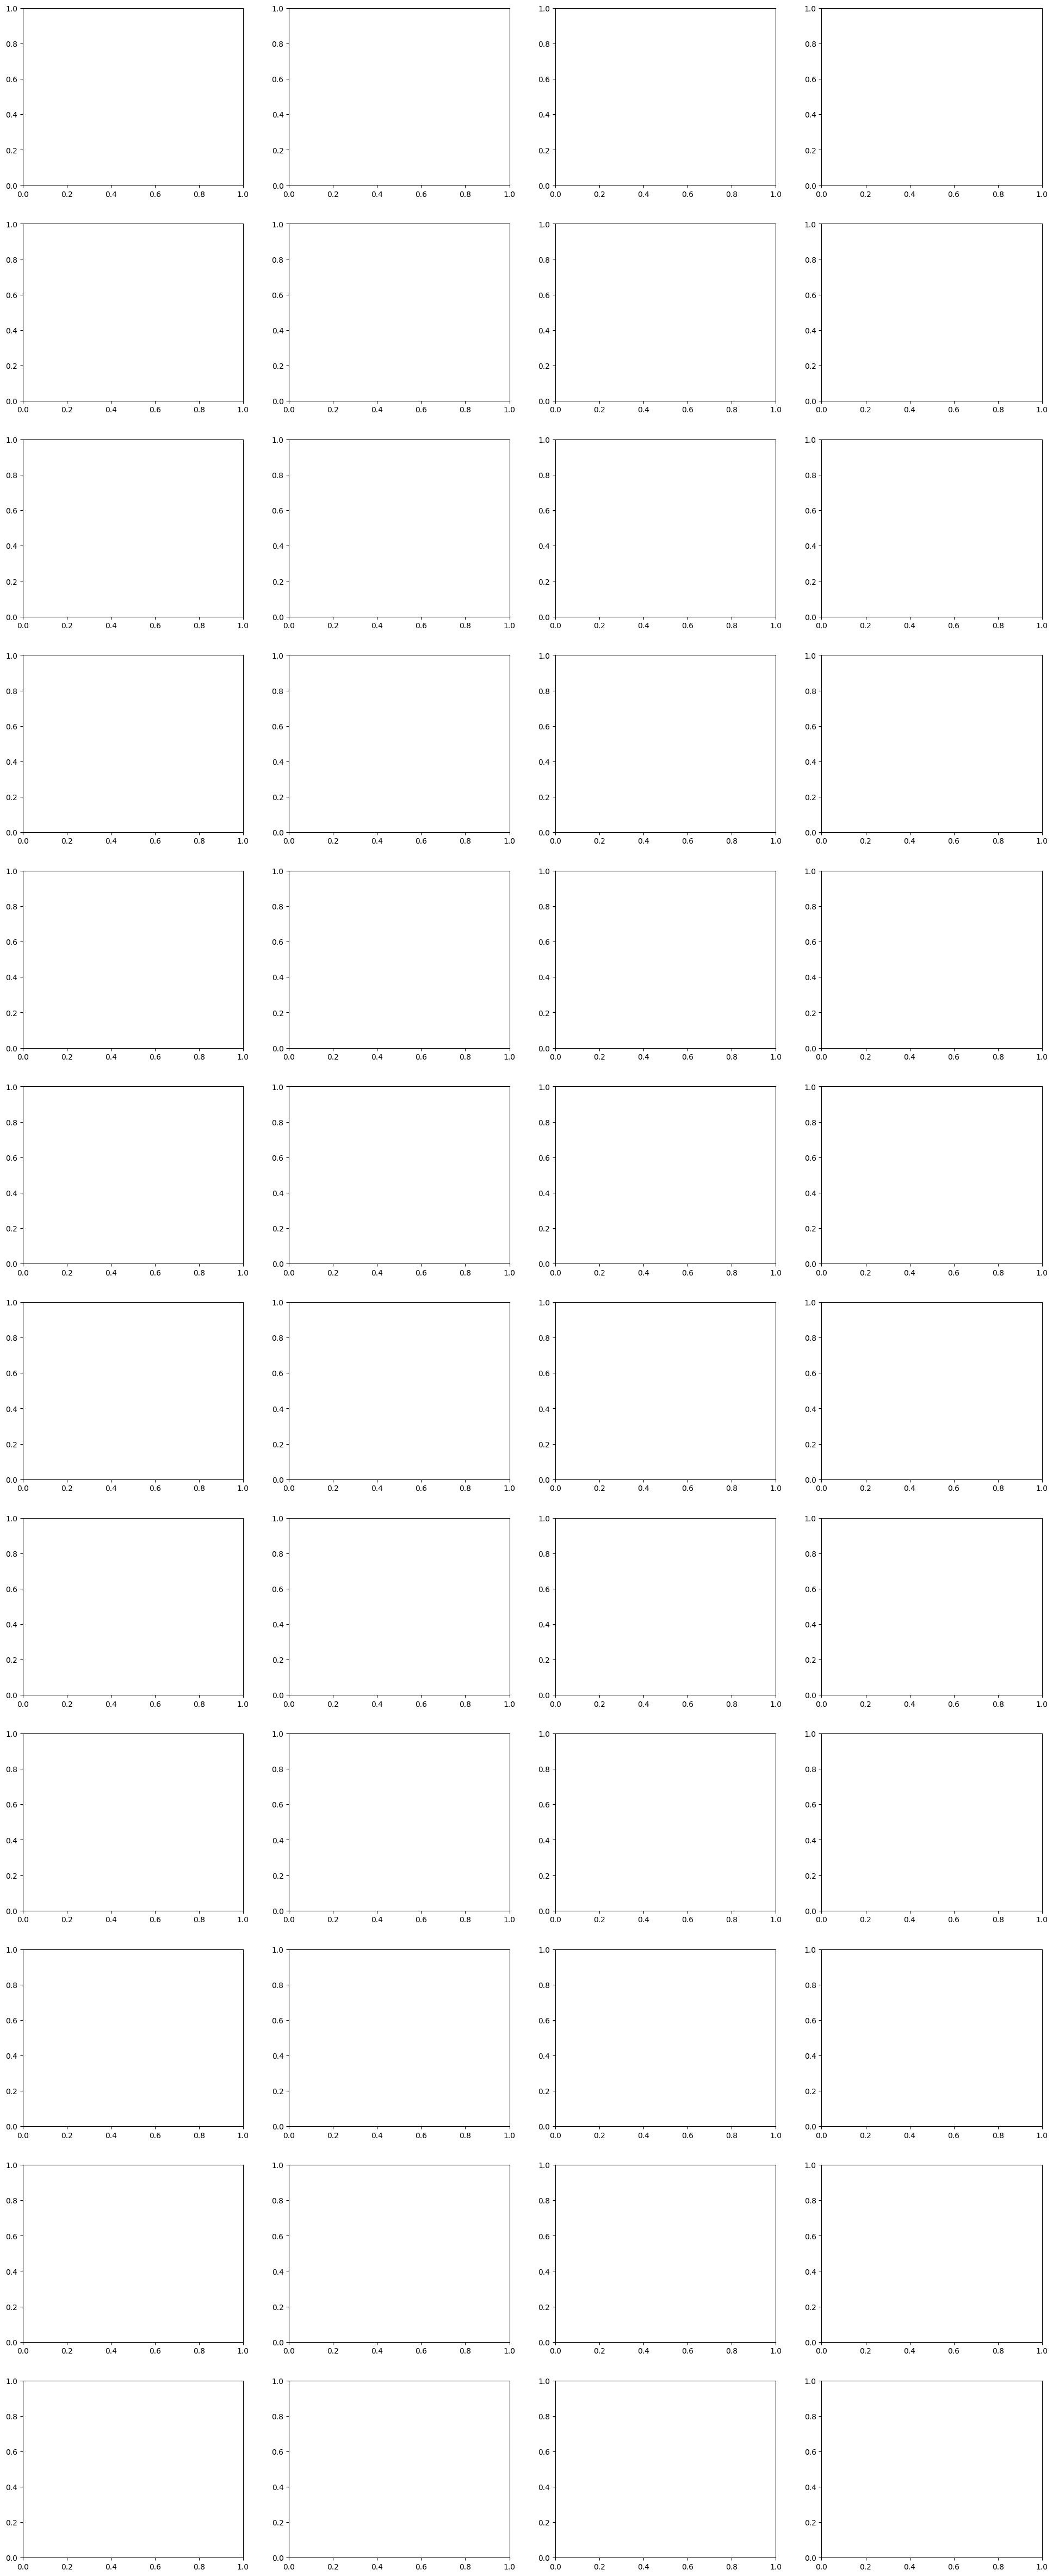

In [3]:
# Number of features and classes
num_features = len(selected_features)
num_classes = len(best_clf_rf.classes_)

# Create a subplot grid with num_features rows and num_classes columns
fig, axs = plt.subplots(num_features, num_classes, figsize=(20, 4 * num_features))

# Adjust layout
fig.tight_layout(pad=3.0)

# Loop through each feature and class to create partial dependence plots
for i, feature in enumerate(selected_features):
    for j, class_label in enumerate(best_clf_rf.classes_):
        # Specify the target class for partial dependence plots
        target_class = class_label
        
        # Generate partial dependence plot
        PartialDependenceDisplay.from_estimator(
            best_clf_rf, X_train_selected, [i], ax=axs[i, j], grid_resolution=50,
            target=target_class, response_method="predict_proba", n_jobs=-1
        )
        
        # Set title for the first row only
        if i == 0:
            axs[i, j].set_title(f'Class: {class_label}', fontsize=16)

        # Set ylabel for the first column only
        if j == 0:
            axs[i, j].set_ylabel(f'Feature: {feature}', fontsize=12)

# Add a main title to the figure
fig.suptitle('Partial Dependence Plots per Feature and Class', fontsize=24, y=1.02)
plt.subplots_adjust(top=0.95)  # Adjust to make space for the title

# Display the plot
plt.show()

In [8]:
# Load the means and standard deviations
statistics = pd.read_csv('datafiles/means_and_stds.csv')

def standardized_to_absolute(z, mean, std_dev):
    return z * std_dev + mean

c:\Program Files\Python310\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:1289: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


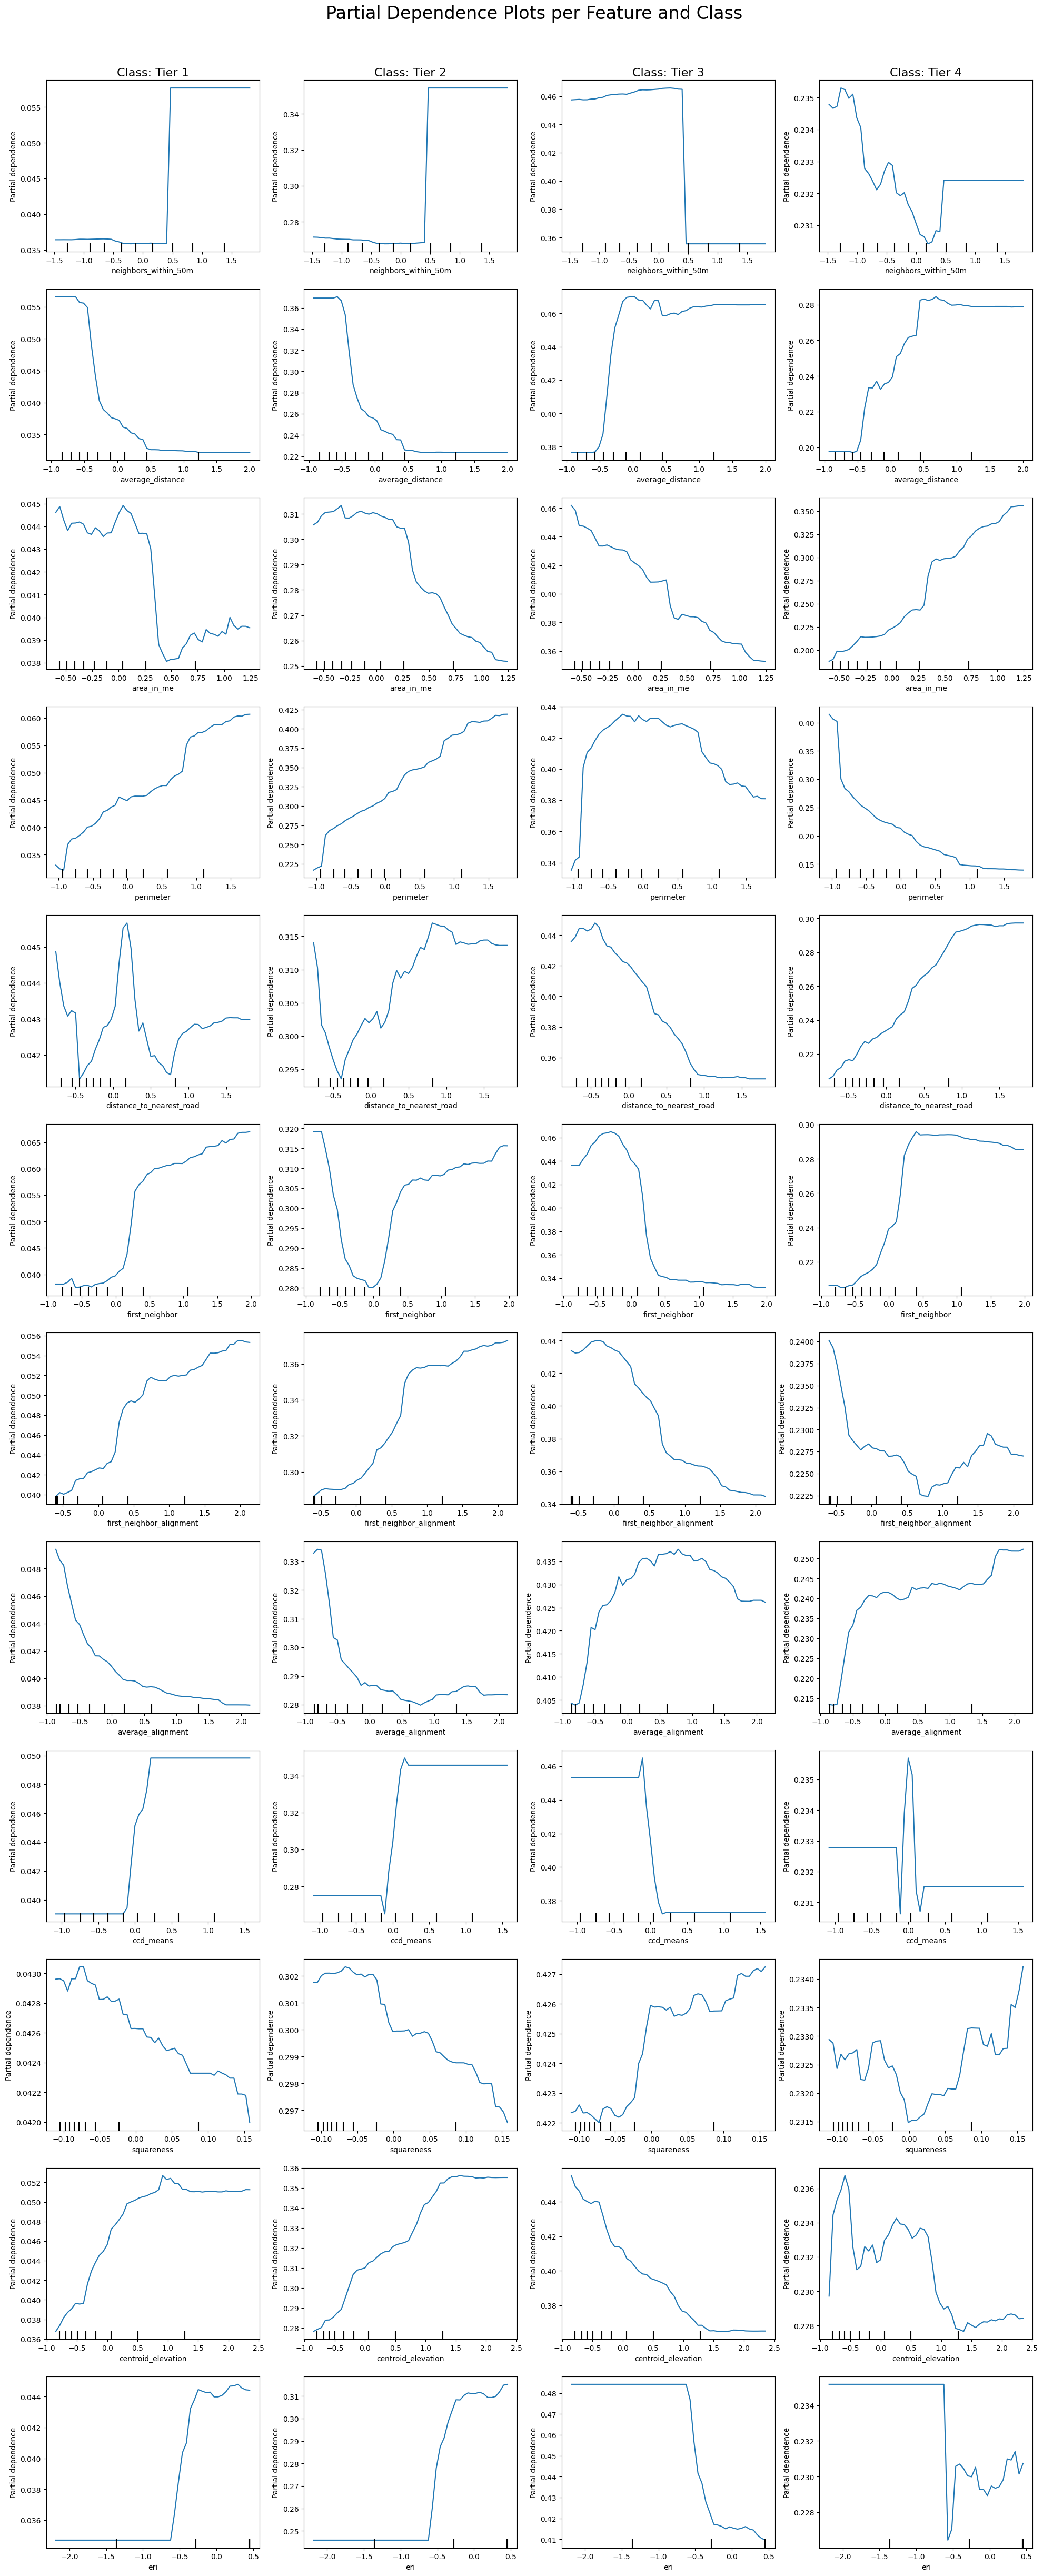

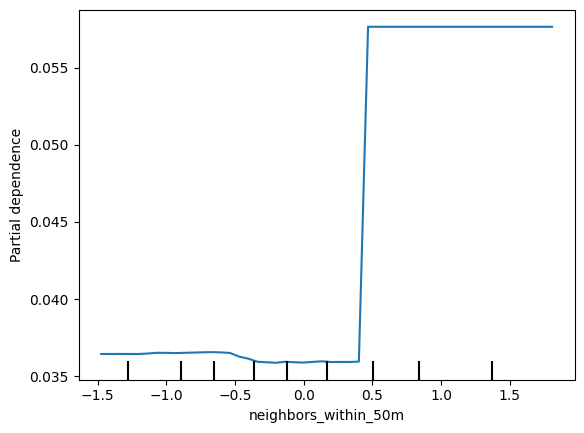

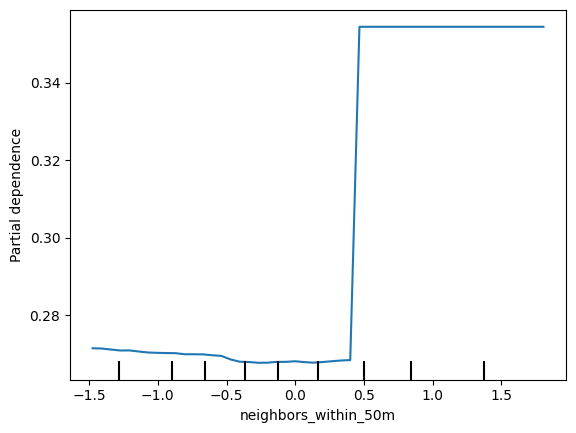

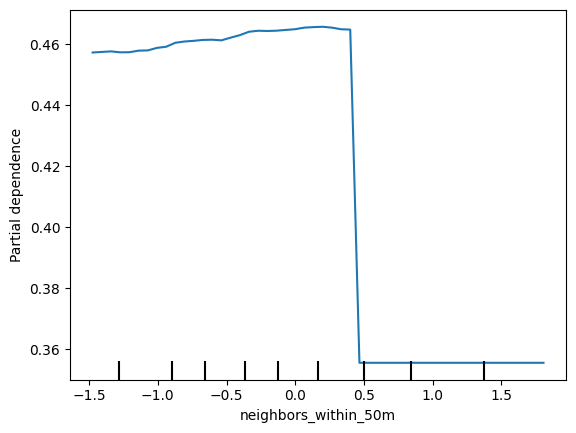

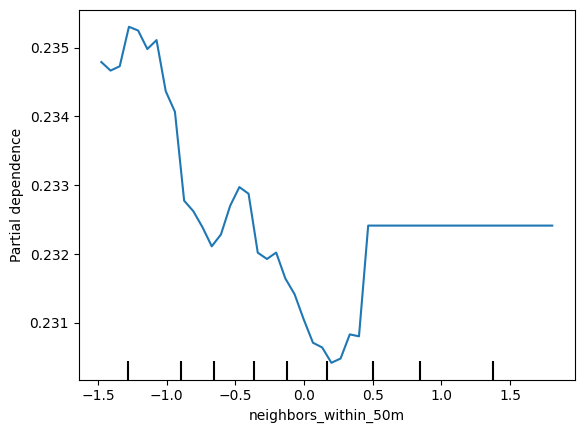

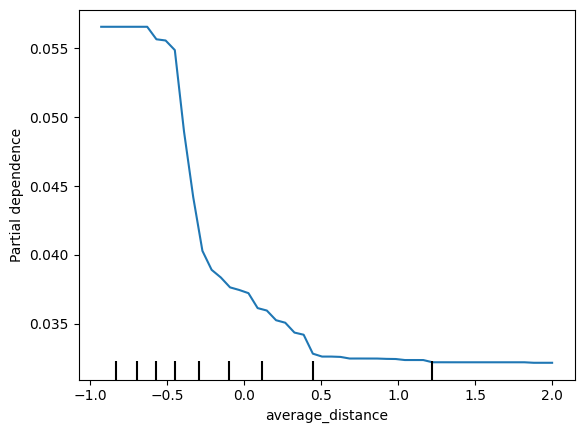

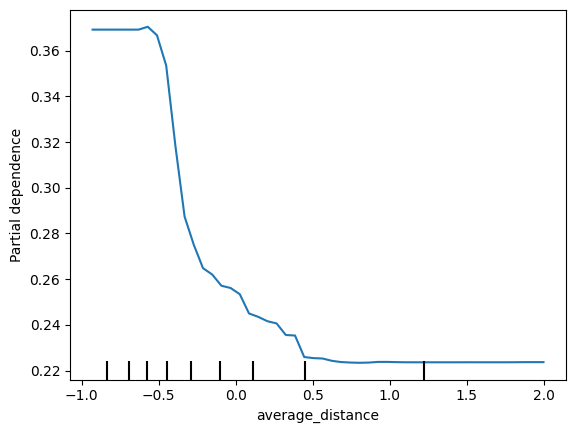

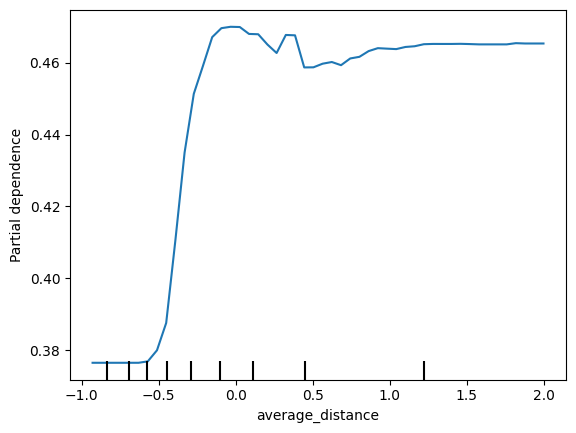

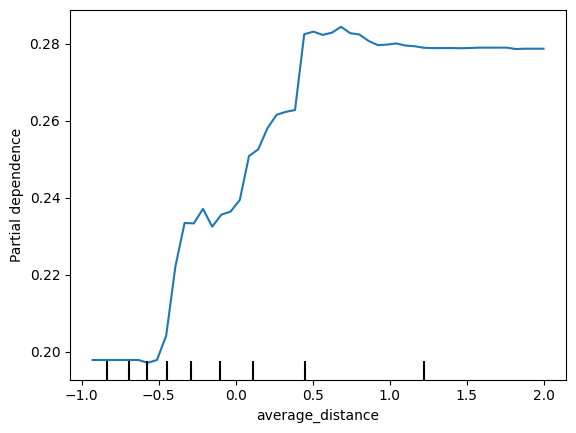

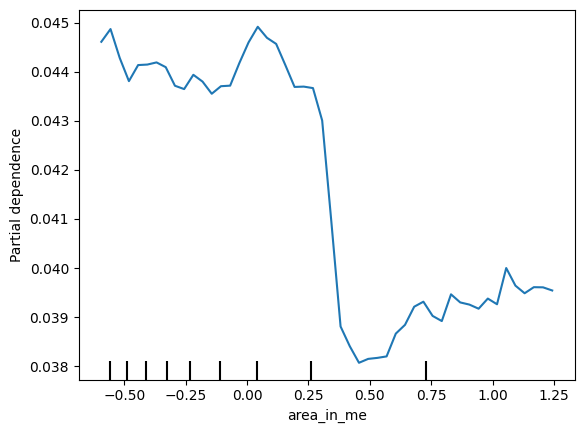

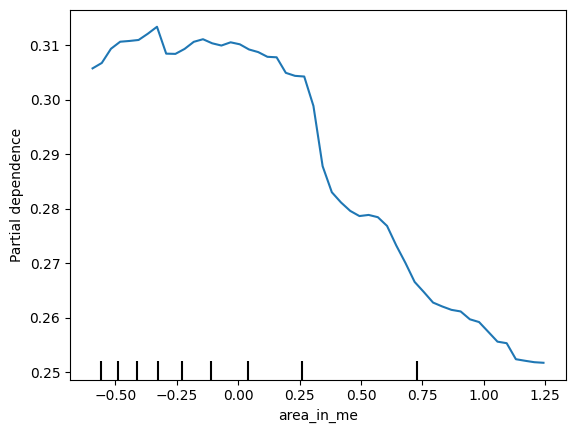

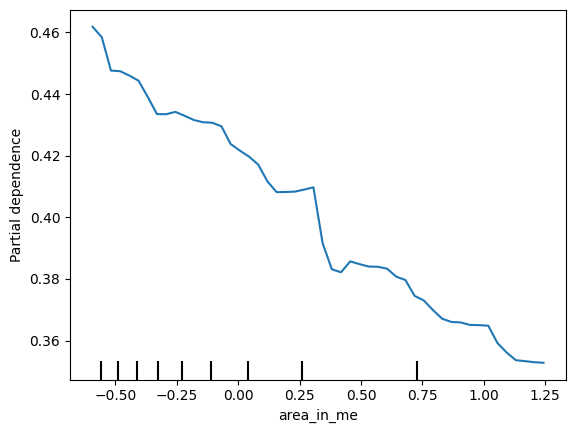

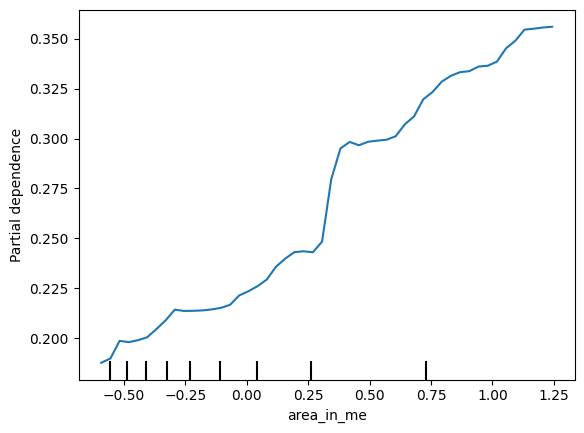

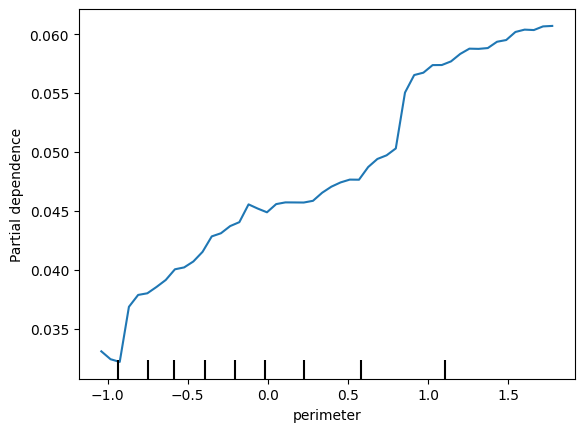

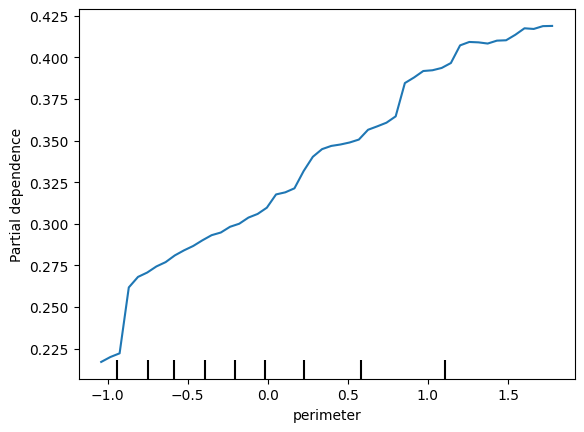

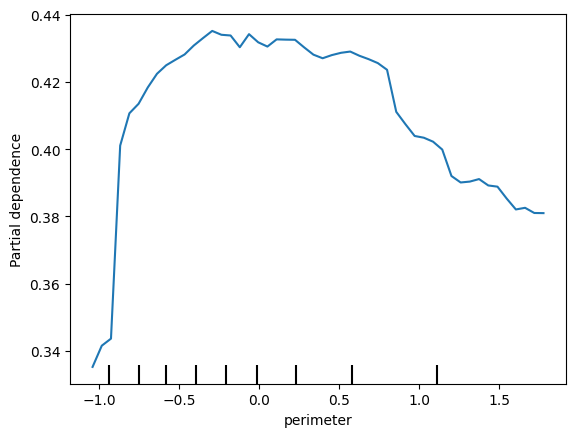

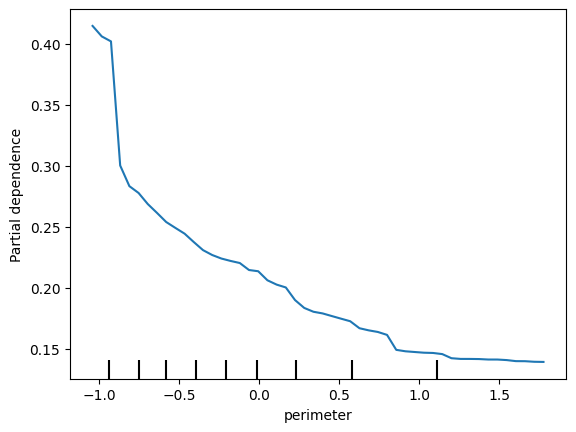

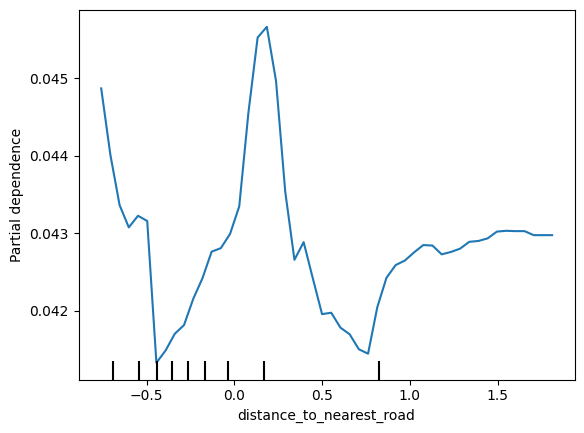

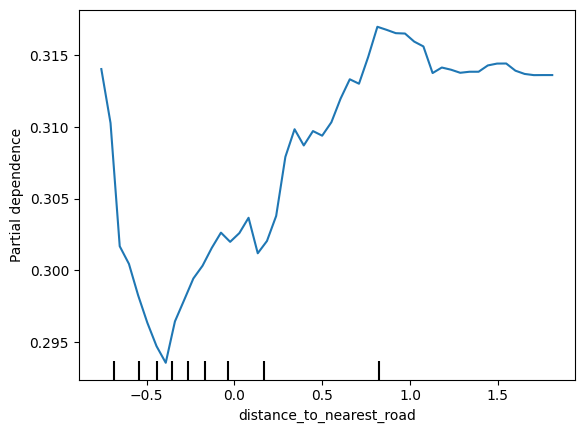

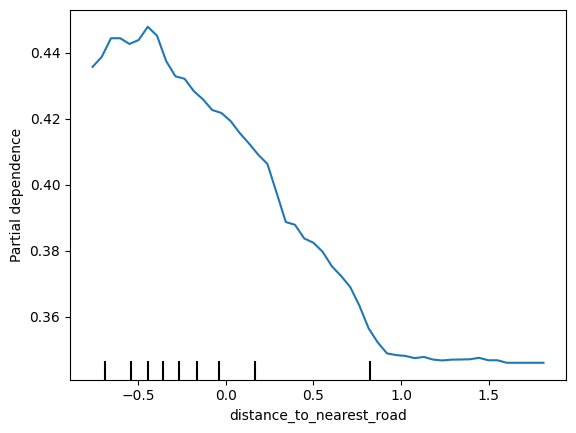

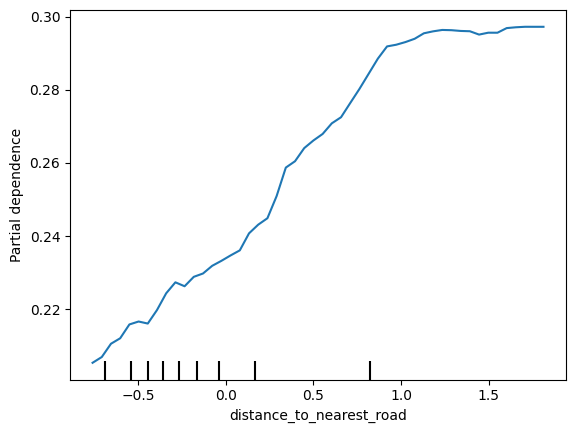

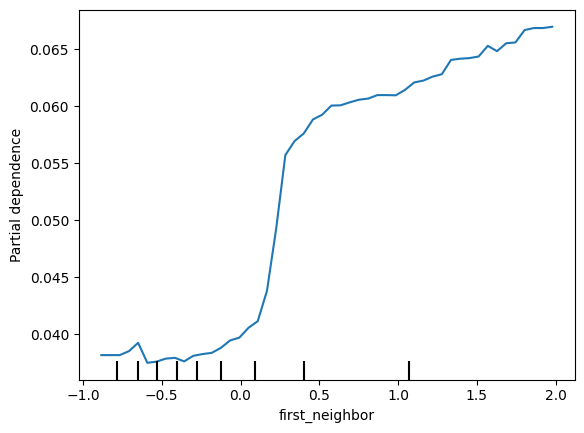

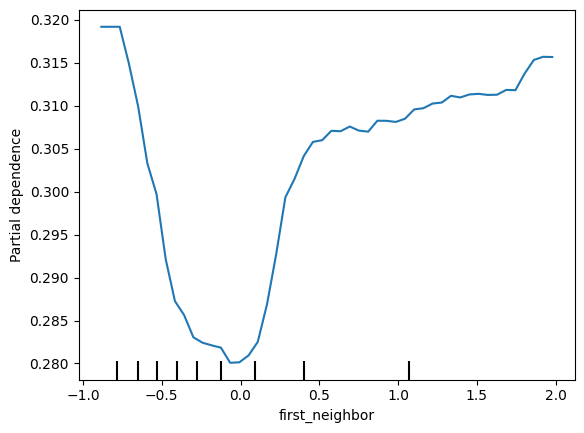

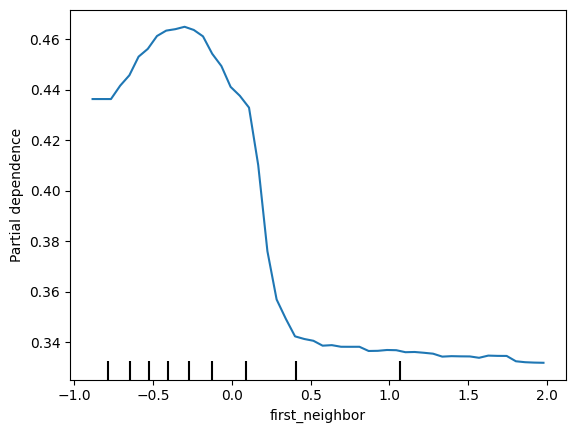

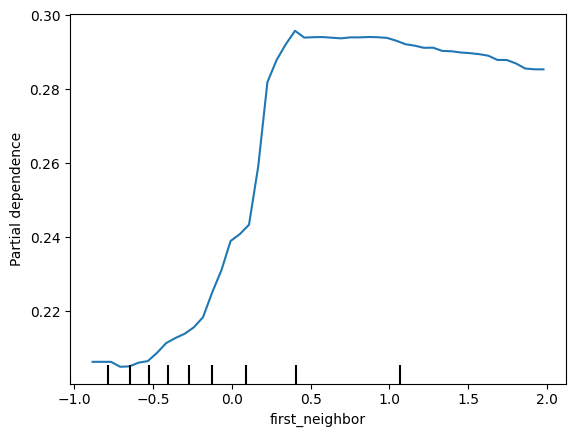

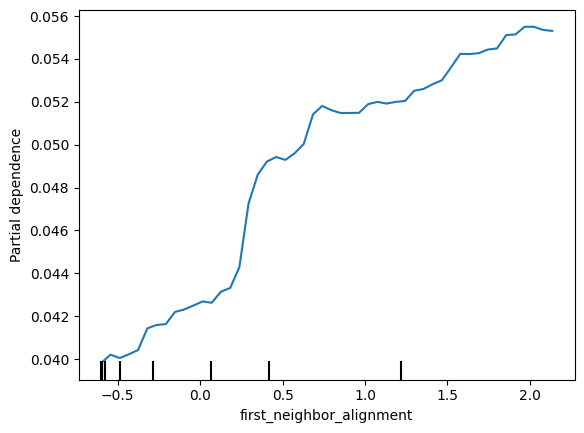

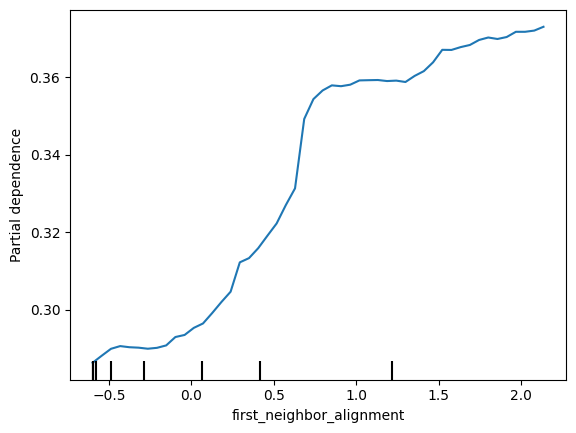

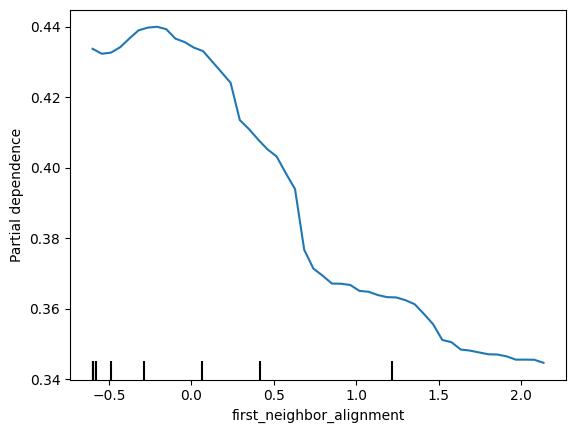

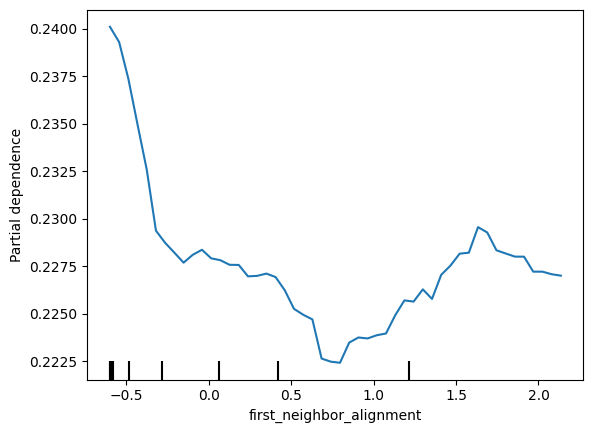

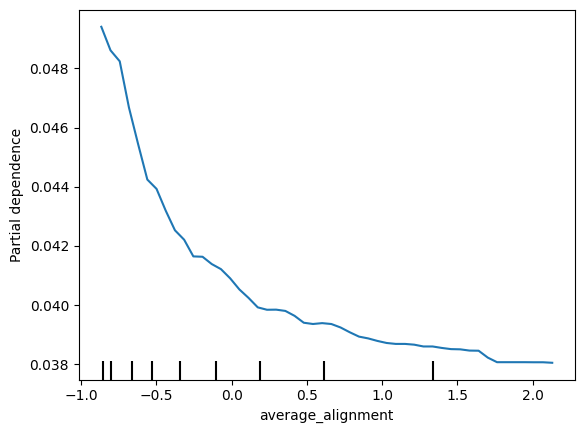

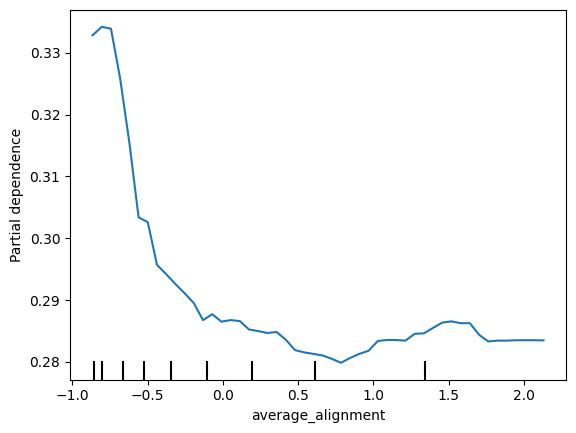

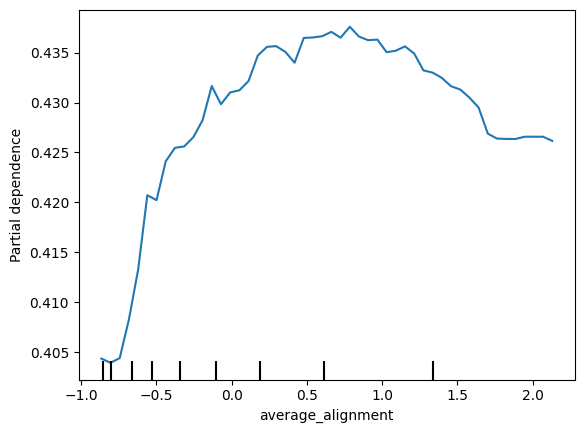

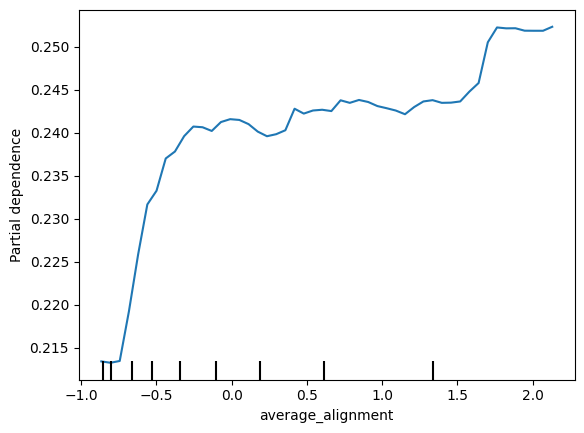

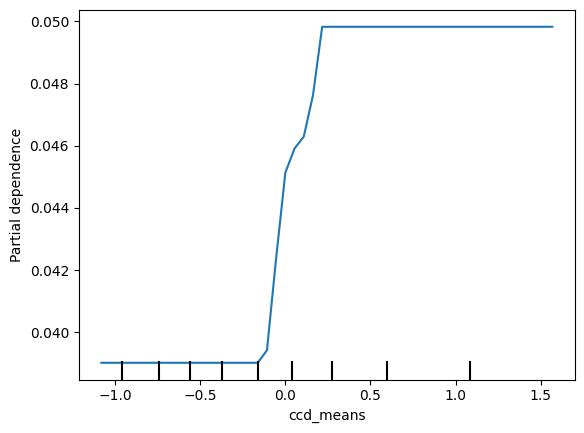

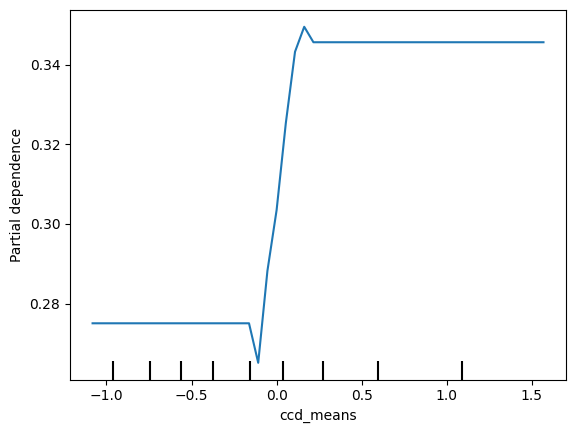

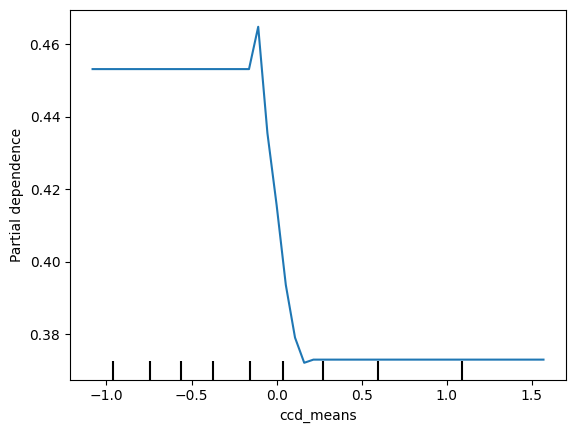

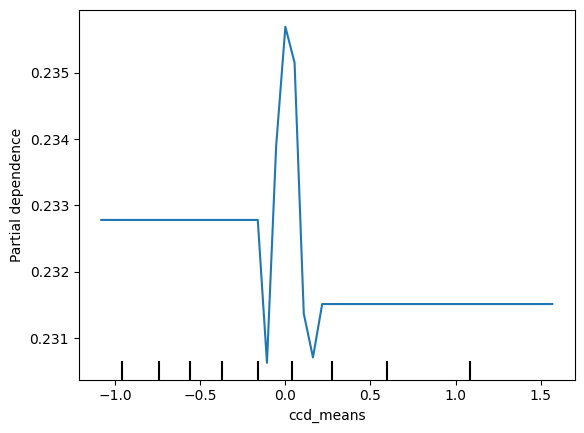

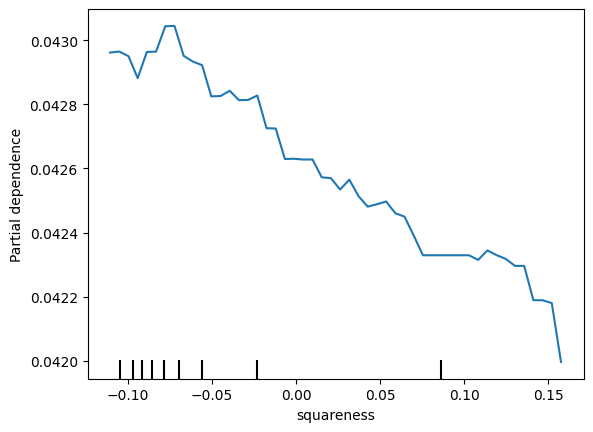

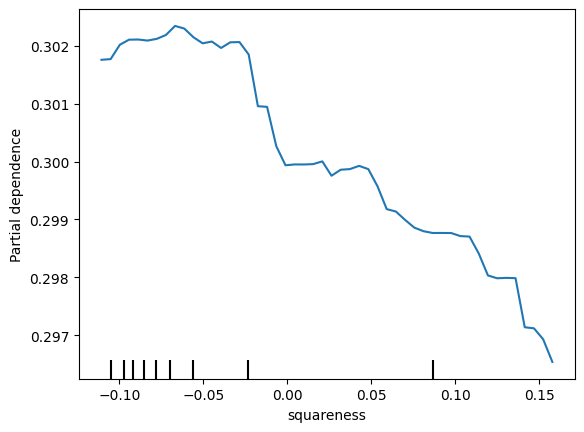

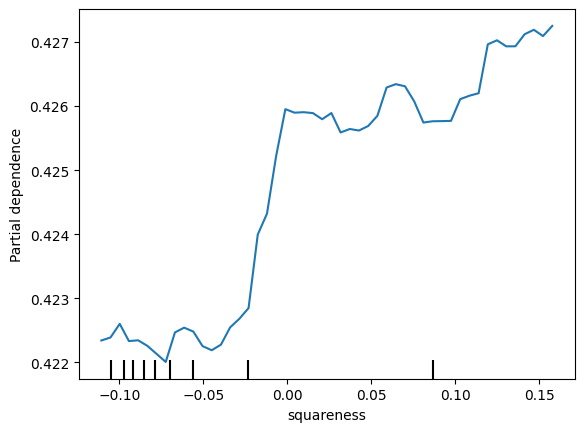

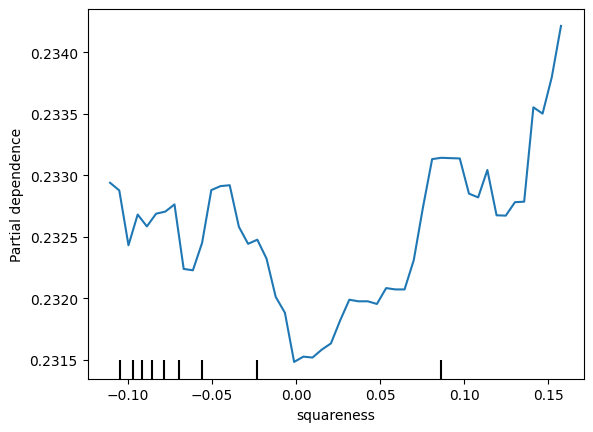

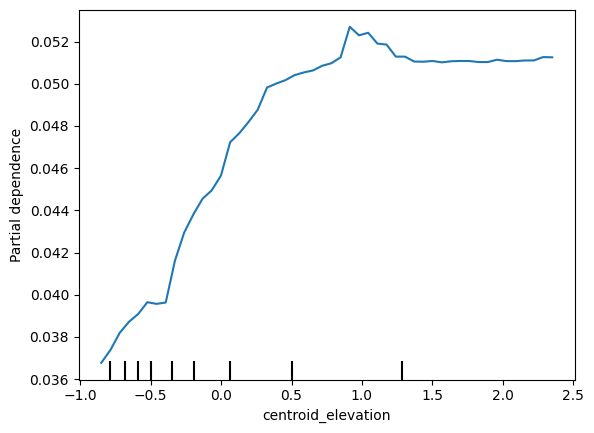

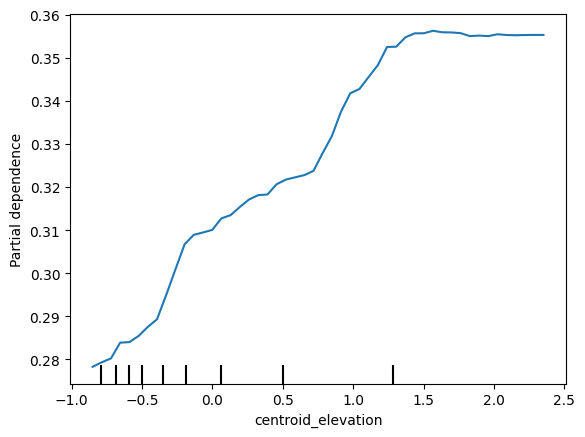

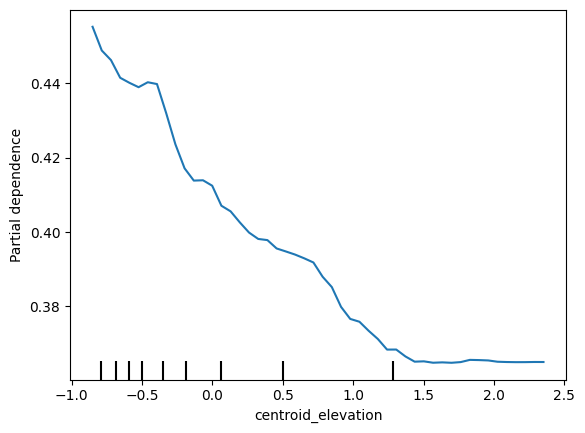

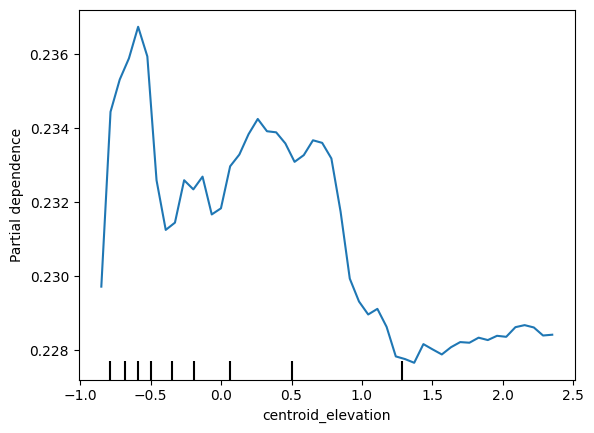

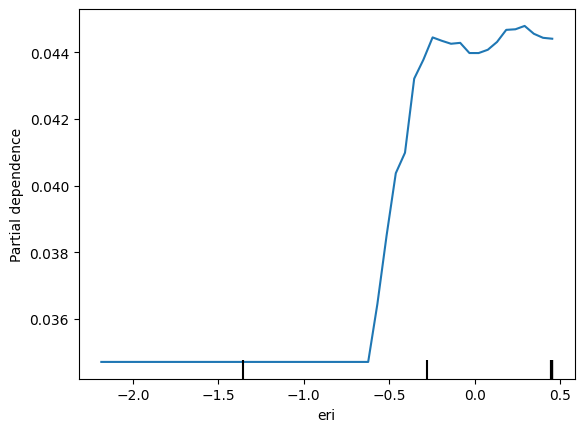

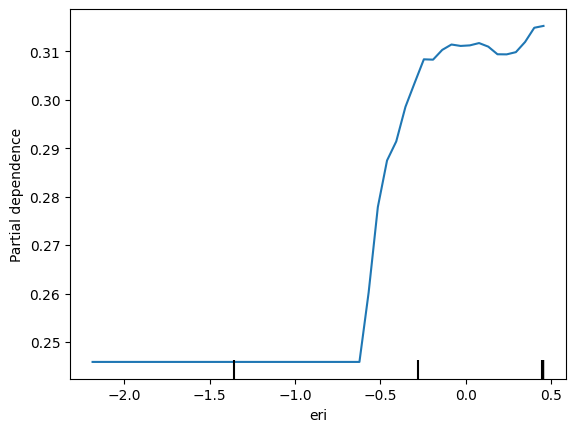

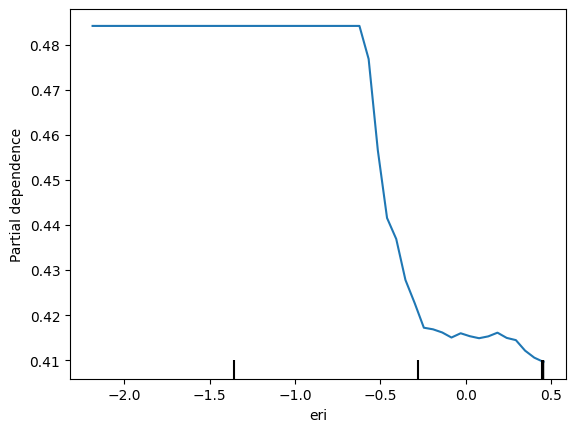

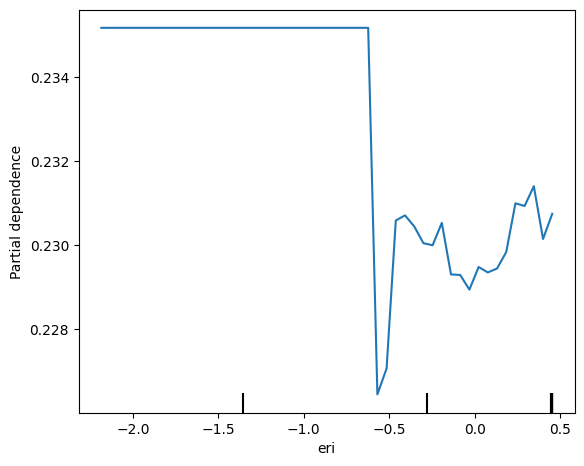

In [4]:
# Number of features and classes
num_features = len(selected_features)
num_classes = len(best_clf_rf.classes_)

# Create a subplot grid with num_features rows and num_classes columns
fig, axs = plt.subplots(num_features, num_classes, figsize=(20, 4 * num_features))

# Adjust layout
fig.tight_layout(pad=3.0)

# Loop through each feature to set the plots and adjust y-axis per row
for i, feature in enumerate(selected_features):
    # Each row (`axs[i]`) is assigned to a set of subplots for each class
    for j, class_label in enumerate(best_clf_rf.classes_):
        # Specify the target class for partial dependence plots
        target_class = class_label

        # Generate partial dependence plot
        disp = PartialDependenceDisplay.from_estimator(
            best_clf_rf, X_train_selected, [feature], ax=axs[i, j], grid_resolution=50,
            target=target_class, response_method="predict_proba", n_jobs=-1
        )

        # Set title for the first row only
        if i == 0:
            axs[i, j].set_title(f'Class: {class_label}', fontsize=16)

        # Set ylabel for the first column only
        if j == 0:
            axs[i, j].set_ylabel(f'Feature: {feature}', fontsize=12)

# Add a main title to the figure
fig.suptitle('Partial Dependence Plots per Feature and Class', fontsize=24, y=1.02)
plt.subplots_adjust(top=0.95)  # Adjust to make space for the title

# Display the plot
plt.show()